# Introduction to PyTorch

Revision: 1.00 , Date: $16^{th}. May, 2021$

Source: [erozita](https://github.com/ezorita/pytorch_notebooks/blob/master/1_introduction_to_pytorch.ipynb)

---

Let's start by importing all the essential modules.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Tensors and Gradients

### 1. Tensors

Tensors are like numpy arrays/matrices: 

In [2]:
a  = torch.tensor([[1, 2, 3], [1, 2, 3]], dtype=torch.float32)
print(a)

tensor([[1., 2., 3.],
        [1., 2., 3.]])


There are several ways to initialize tensors in PyTorch, just like its the case with initializing numpy arrays.

In [3]:
b = torch.ones(2,3)
print(f'b: {b}')
c = torch.zeros(2,3)
print(f'c: {c}')
d = torch.randn(4, 4)
print(f'd: {d}')

b: tensor([[1., 1., 1.],
        [1., 1., 1.]])
c: tensor([[0., 0., 0.],
        [0., 0., 0.]])
d: tensor([[ 1.5727, -0.9121, -1.2754,  0.8197],
        [-0.3737, -0.4267,  0.7139,  0.1408],
        [ 0.2777,  0.2037,  0.7357, -0.1995],
        [ 1.1090, -0.3205,  0.4893, -0.3355]])


Numpy arrays can be converted to tensors using `from_numpy` functions or im

In [4]:
a = np.array([[-3, -2, -1], [97, 98, 99]])
t1 = torch.from_numpy(a)
print(f't1: {t1}')

t2 = torch.tensor(a)
print(f't2: {t2}')

t1: tensor([[-3, -2, -1],
        [97, 98, 99]])
t2: tensor([[-3, -2, -1],
        [97, 98, 99]])


we can simply do element wise arithemetic operations with tensors

In [5]:
a = torch.tensor([[1,0],[0,1]])
b = torch.tensor([[1,-1],[-1,1]])
print(f'a+b: {a+b}')
print(f'a-b: {a-b}')
print(f'a*b: {a*b}')
print(f'a/b: {a/b}')

a+b: tensor([[ 2, -1],
        [-1,  2]])
a-b: tensor([[0, 1],
        [1, 0]])
a*b: tensor([[1, 0],
        [0, 1]])
a/b: tensor([[1., -0.],
        [-0., 1.]])


we can also perform other operations like matrix multiplications using `torch.mm`

In [6]:
c = torch.mm(a, b) # I(identity-matrix) X B = B
print(f'c: {c}')

c: tensor([[ 1, -1],
        [-1,  1]])


### 2. Tensor Gradients

By default PyTorch tensors represent function constants. We can convert them to function variables (weights) by setting `required_grad` (boolean, argument of a tensor constructor) **True**

In [7]:
t = torch.tensor([[1,1],[2,2]], dtype=torch.float32)
print(f'default required_grad value of t: {t.requires_grad}')

t = torch.tensor([1,2,3,4], dtype=torch.float32, requires_grad=True)
print(f"once its initialized as a weight matrix t's requires_grad: {t.requires_grad}")

# We can set this to false or true later as well to useful to freeze some layers
t.requires_grad = False
print(f"resetting it to constant matrix t's requires_grad: {t.requires_grad}")

default required_grad value of t: False
once its initialized as a weight matrix t's requires_grad: True
resetting it to constant matrix t's requires_grad: False


## Optimization


### Fitting a linear model
Model description

As an example, we want to optimize the fitting of a linear model to several datapoints using tensor gradients. We will use stochastic gradient descent to find the values of our parameters that minimize the error between the modeled line and the datapoints.

Since we are fitting a linear model, the parameters to optimize are the slope $a$ and the offset $b$ of the linear equation
$$\hat{y}(x) = a x + b$$

Optimizing the model reduces to finding the values of $a$ and $b$ that minimize the mean squared error of the data samples $(x_i,y_i)$:
$$\min_{a,b} \frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}(x_i))^2$$
Data samples

We start by defining our data samples

In [18]:
x = torch.tensor([0,1,2,3,4,5,6,7,8, 10], dtype=torch.float32)
a = torch.ones(10)
a = a*5
# adding some randomness
randomness = torch.rand(10)

y = a*x + randomness

We can easily visualize the datapoints in a 2D tensor

In [19]:
xy = torch.stack((x,y))
print(torch.t(xy))

tensor([[ 0.0000,  0.6866],
        [ 1.0000,  5.4072],
        [ 2.0000, 10.5659],
        [ 3.0000, 15.4073],
        [ 4.0000, 20.3650],
        [ 5.0000, 25.4268],
        [ 6.0000, 30.4522],
        [ 7.0000, 35.6960],
        [ 8.0000, 40.5056],
        [10.0000, 50.3924]])



Model parameters

We allocate two tensors a and b as parameters (weight metrices)

In [21]:
a = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
b = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
print(f'a: {a}')
print(f'b: {b}')

a: 0.0
b: 0.0



Cost function

Also known as the loss function, is the target function to optimize, in our case the mean squared error and lets see the loss with initial parameters


In [31]:
loss = 1/len(x)*torch.sum(torch.pow(y - a*x - b, 2))
print(loss)

tensor(782.1626, grad_fn=<MulBackward0>)



### The optimizer

#### Gradient Updates

The optimizer is a buffer that collects the computed gradients and updates the parameters according to an algorithm. The update is triggered every time we call the method `step()`. It is important to remark that the **optimizer does not compute the gradients**.

#### Gradient Computation

The gradients are computed and stored in the tensors whose `require_grad` attribute is set to **True**. To compute the gradients we have to use `backward()` on a Tensor that represents a function of the parameters.

#### Gradient Update Algorithm

We will be using Stochastic Gradient Descent for optimization. The algorithm is defined in `torch.optim.SGD` and requires the parameters to be optimized and the learning rate


In [26]:
optimizer = torch.optim.SGD([a,b], lr=0.01)



It is important to reset the gradients stored in the optimizer before each gradient computation


In [28]:
optimizer.zero_grad()

# the gradients are now set to 0
print(a.grad)
print(b.grad)

None
None


We want to compute the gradients of the parameters wrt the Loss function. To do so, we use the `backward()` on Loss

In [32]:
loss.backward()

# check the gradients
print(a.grad)
print(b.grad)

tensor(-616.7635)
tensor(-93.9620)


Once the gradients are computed, we perform a gradient descent step and reset the stored gradients


In [33]:
optimizer.step()
optimizer.zero_grad()

Let's check how the values of $a$ and $b$ have changed and whether the loss has decreased

In [34]:
print(f'new value of a: {a}')
print(f'new value of b: {b}')

new value of a: 6.167635440826416
new value of b: 0.9396199584007263


In [35]:
loss = 1/len(x)*torch.sum(torch.pow(y - a*x - b, 2))
print(loss)

tensor(46.6387, grad_fn=<MulBackward0>)



## SGD iterations

Each SGD step updates our parameters according to the current gradients and the learning rate. We need several iterations to find the optimal values for $a$ and $b$. Let's iterate the same procedure 10 times to refine the fit of the model


In [36]:
for i in np.arange(10):
    # Reset gradients
    optimizer.zero_grad()
    
    # Compute loss and gradients
    loss = 1/len(x)*torch.sum(torch.pow(y - a*x - b, 2))
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    # Print loss of previous step
    print(f'Loss: {loss}')

tensor(46.6387, grad_fn=<MulBackward0>)
tensor(6.6865, grad_fn=<MulBackward0>)
tensor(0.9796, grad_fn=<MulBackward0>)
tensor(0.1643, grad_fn=<MulBackward0>)
tensor(0.0476, grad_fn=<MulBackward0>)
tensor(0.0308, grad_fn=<MulBackward0>)
tensor(0.0283, grad_fn=<MulBackward0>)
tensor(0.0277, grad_fn=<MulBackward0>)
tensor(0.0275, grad_fn=<MulBackward0>)
tensor(0.0273, grad_fn=<MulBackward0>)


After 10 steps we see that the loss has converged. We can try to improve it by doing smaller steps (reducing the learning rate), but it's important to remember that the Loss will never reach 0 because the data does not perfectly fit a linear distribution.

Let's iterate again with **LR=0.001**

In [37]:
optimizer.param_groups[0]['lr'] = 1e-3

In [38]:
for i in np.arange(10):
    # Reset gradients
    optimizer.zero_grad()
    
    # Compute loss and gradients
    loss = 1/len(x)*torch.sum(torch.pow(y-a*x-b, 2))
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    # Print loss of previous step
    print(f'Loss: {loss}')

tensor(0.0272, grad_fn=<MulBackward0>)
tensor(0.0271, grad_fn=<MulBackward0>)
tensor(0.0271, grad_fn=<MulBackward0>)
tensor(0.0271, grad_fn=<MulBackward0>)
tensor(0.0271, grad_fn=<MulBackward0>)
tensor(0.0271, grad_fn=<MulBackward0>)
tensor(0.0270, grad_fn=<MulBackward0>)
tensor(0.0270, grad_fn=<MulBackward0>)
tensor(0.0270, grad_fn=<MulBackward0>)
tensor(0.0270, grad_fn=<MulBackward0>)


Indeed, it seems that the Loss has converged.
## Results

The final values after optimization

In [39]:
print(f'Loss: {loss}')
print(f'a: {a}')
print(f'b: {b}')

Loss: 0.02699713408946991
a: 4.959807395935059
b: 0.7400157451629639


And this is how our linear model looks like

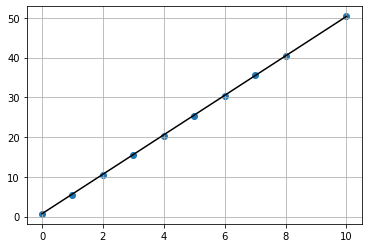

In [42]:
plt.scatter(x.numpy(), y.numpy())
plt.plot(np.arange(11), np.arange(11)*a.detach().numpy()+b.detach().numpy(), 'k')
plt.grid()